In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex
import numpy as np

import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza/pobreza_0.01_q2010-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2010-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2011-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2012-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-08-15.csv',
 './../data/Pobreza/pobreza_0.01_q2013-11-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-02-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-05-15.csv',
 './../data/Pobreza/pobreza_0.01_q2014-08-15.csv',
 './../data/Pobreza/pobreza_0.0

In [3]:
cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

cpi_Q = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_Q.csv', index_col=0)
cpi_Q.index = pd.to_datetime(cpi_Q.index)

cpi_actual = cpi_M.loc['2022-05']['index'][0]
cpi_2010Q4 = cpi_Q.loc['2010-11']['index'][0]
cpi_ref = cpi_M.loc['2016-01']['index'][0]

In [4]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [5]:
# df_list = []
# for f in allFiles:
#     print(f)
    
f = './../data/Pobreza/pobreza_0.01_q2010-11-15.csv'
groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
vars_ = ['INGRESO', 'P47T_persona']

data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
data = data.merge(aglo_labels)
data['AGLO_si'] = data.AGLOMERADO != 0
data['Total'] = True

data = data.loc[data.AGLO_si == 1]

data.loc[data.INGRESO == 0, 'decil_P47T'] = 'sin ingresos'
data.loc[data.INGRESO == 1, 'P47T_persona'] = data.loc[data.INGRESO == 1, 'P47T_persona'] + np.random.uniform(0, .01, data.INGRESO.sum())
data.loc[data.INGRESO == 1, 'decil_P47T'] = pd.qcut(data.loc[data.INGRESO == 1, 'P47T_persona'], q = 10, labels = range(1, 11))

data['Q'] = pd.to_datetime(data['Q'])
# df104 = df.loc[df.Q == '2010-11-15']

In [6]:
# df104 = df.loc[df.Q == '2010-11-15']

In [7]:
# pd.read_csv(f, nrows = 5).T

In [8]:
## Tabla:

# Personas con ingresos (aprox 14.377, sin ingresos 10.510 para un total de 24.887 en aglos)


In [9]:
tabla = data.groupby(['decil_P47T']).agg({'P47T_persona': ['min', 'max', 'size', 'sum', 'mean']})['P47T_persona']
tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']]*(cpi_2010Q4/cpi_ref)
tabla[['size', 'sum']] = 100*tabla[['size', 'sum']]
tabla['pct'] = 100*tabla['sum']/tabla['sum'].sum()
tabla.loc['Total'] = tabla.iloc[:-1].agg({'min': 'min', 'max': 'max','size': 'sum', 'sum': 'sum', 'mean': 'mean', 'pct': 'sum'})

tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']].round(-1).astype(int)
tabla['size'] = (tabla['size']/1e3).round(1)
tabla['sum'] = (tabla['sum']/1e6).round(1)
tabla['pct'] = tabla['pct'].round(1)
tabla.columns = ['Mínimo', 'Máximo', 'Población (miles)', 'Ingresos (mill. ARS)', 'Media', '% de suma de ingresos']
tabla

,Mínimo,Máximo,Población (miles),Ingresos (mill. ARS),Media,% de suma de ingresos
decil_P47T,,,,,,
1,30,500,1555.1,511.8,330,1.4
2,500,800,1555.0,1045.2,670,2.8
3,800,1040,1555.0,1463.5,940,3.9
4,1040,1400,1555.0,1862.3,1200,5.0
5,1400,1750,1555.1,2406.2,1550,6.5
6,1750,2030,1555.0,3008.3,1930,8.1
7,2030,2700,1555.0,3754.9,2410,10.1
8,2700,3500,1555.0,4729.8,3040,12.7
9,3500,5000,1555.0,6422.1,4130,17.2


## Series de tiempo

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles


def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('Q', label = 'left').mean().interpolate('linear').rolling(4, center = True).mean()


In [11]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [12]:
# Percentile funcs
def q10(x):
    return x.quantile(0.1)

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

def q90(x):
    return x.quantile(0.9)

# Series de Tiempo. Hogares

In [13]:
# Stats a nivel Hogar

mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles[:2]:
    print(f)
    
    vars_ = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    table = data.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])

    df_list += [table]
    
df = pd.concat(df_list)
df.index = pd.to_datetime(df.index)


./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv


In [14]:
### Anio 2020-21

In [30]:
# Stats a nivel Hogar

# mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles:
    if '2020' in f or '2021' in f:
        print(f)

        vars_ = ['P47T_persona']
        data = pd.read_csv(f, usecols = ['PERSONA_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
        data = data.loc[data.AGLOMERADO != 0]
#         data = data.drop_duplicates()

#         data['IPCF'] = data['P47T_hogar']/data['IX_TOT']

#         table = data.groupby(['Q'])['P47T_persona'].agg(['mean', q10, q25, 'median', q75, q90])

        df_list += [data]
    
df2021 = pd.concat(df_list)
df2021 = df2021.set_index('Q')
df2021.index = pd.to_datetime(df2021.index)

./../data/Pobreza/pobreza_0.01_q2020-02-15.csv
./../data/Pobreza/pobreza_0.01_q2020-05-15.csv
./../data/Pobreza/pobreza_0.01_q2020-08-15.csv
./../data/Pobreza/pobreza_0.01_q2020-11-15.csv
./../data/Pobreza/pobreza_0.01_q2021-02-15.csv
./../data/Pobreza/pobreza_0.01_q2021-05-15.csv
./../data/Pobreza/pobreza_0.01_q2021-08-15.csv
./../data/Pobreza/pobreza_0.01_q2021-11-15.csv


### Distribucion del ingreso

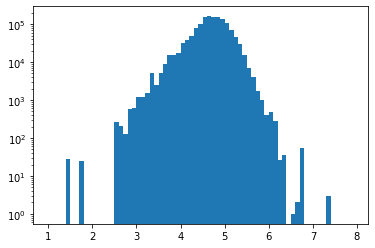

In [78]:
data = df2021.reset_index()[['P47T_persona']]
data = data.loc[data.P47T_persona > 0]
data = data*(cpi_actual/cpi_ref)
data = np.log10(data)

plt.hist(data, bins = np.arange(1, 8, .1))
plt.yscale('log')
plt.show()

In [111]:
data = df2021.reset_index()[['P47T_persona']]
data = data.loc[data.P47T_persona > 0]
data = data*(cpi_actual/cpi_ref)
# pd.cut(data.P47T_persona, bins = np.arange(1, 8, .1))
data['P47T_persona_log'] = np.log10(data['P47T_persona'])
data['bin'] = pd.cut(data.P47T_persona_log, bins = np.arange(1, 8, .1))


In [102]:
info = data.groupby('bin').agg(['mean', 'size', 'sum'])['P47T_persona']
info[['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)
info.sample(5)#.tail()

,mean,size,sum
bin,,,
"(4.7, 4.8]",56252.595159,0.108720,8.724274e-02
"(7.8, 7.9]",NaN,0.000000,0.000000e+00
"(1.7, 1.8]",59.550044,0.000018,1.504300e-08
"(2.5, 2.6]",353.483714,0.000190,9.572305e-07
"(7.4, 7.5]",NaN,0.000000,0.000000e+00


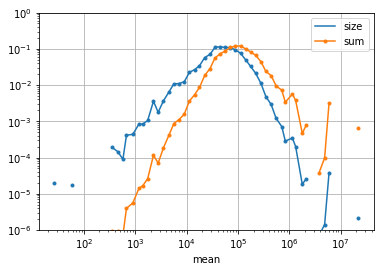

In [106]:
fig, ax = plt.subplots(1, figsize = (6, 4))
info.plot(x = 'mean', y = 'size', ax = ax, marker = '.')
info.plot(x = 'mean', y = 'sum', ax = ax, marker = '.')
ax.set_yscale('log')
ax.set_ylim(1e-6, 1)
ax.grid()
ax.set_xscale('log')

In [112]:
# info.loc[5.2:].dropna()

In [38]:
## Cant total de personas (en AGLOS)
2256360/8/frac

## Cant total de personas que perciben ingreso (en AGLOS)
1411777/8/frac

17647212.5

In [129]:
data = df2021.reset_index()[['P47T_persona']]
data = data.loc[data.P47T_persona > 0]
data = data*(cpi_actual/cpi_ref)
# pd.cut(data.P47T_persona, bins = np.arange(1, 8, .1))
data['P47T_persona'] = data['P47T_persona'] + np.random.uniform(0, 1, len(data))
data['P47T_persona_log'] = np.log10(data['P47T_persona'])
data['bin'] = pd.cut(data.P47T_persona_log, bins = np.arange(1, 8, .1))
data = data.sort_values('P47T_persona').reset_index(drop = True)

In [134]:
nb = 10
data['cnt_bin'] = pd.qcut(data.P47T_persona, nb)
data['log_bin'] = pd.cut(data.P47T_persona_log, bins = nb)
data['val_bin'] = pd.cut(data.P47T_persona.cumsum(), bins = nb)


In [135]:
data.groupby('cnt_bin').agg({'P47T_persona_log': 'mean', 'P47T_persona': ['size', 'sum']})
# data.groupby('val_bin').agg({'P47T_persona_log': 'mean', 'P47T_persona': ['size', 'sum']})

P47T_persona_log P47T_persona              
                                       mean         size           sum
cnt_bin                                                               
(26.343, 15517.919]                3.887052       141178  1.272490e+09
(15517.919, 25669.954]             4.314175       141178  2.939001e+09
(25669.954, 33939.435]             4.479820       141177  4.275435e+09
(33939.435, 40815.469]             4.575180       141178  5.316688e+09
(40815.469, 51016.211]             4.664639       141178  6.533901e+09
(51016.211, 63492.54]              4.756137       141177  8.068354e+09
(63492.54, 78353.384]              4.845468       141178  9.906612e+09
(78353.384, 100442.763]            4.942458       141177  1.239664e+10
(100442.763, 138765.832]           5.066299       141178  1.652226e+10
(138765.832, 22052721.366]         5.311837       141178  3.173569e+10

In [ ]:
3.173569e+10/1.272490e+09

In [173]:
n_percibe_ingreso_en_aglos = len(data)/8/frac
low_lim = 1/(n_percibe_ingreso_en_aglos)

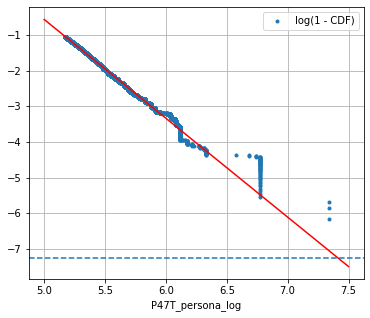

In [178]:
data['1 - CDF'] = data.P47T_persona.rank(pct = True, ascending = False)
data['log(1 - CDF)'] = np.log10(data['1 - CDF'])

fig, ax = plt.subplots(1, figsize = (6, 5))

plot_data = data.tail(120000)
plot_data.plot(x = 'P47T_persona_log', y = 'log(1 - CDF)', lw = 0, marker = '.', ax = ax)


x_fit = plot_data['P47T_persona_log']
y_fit = plot_data['log(1 - CDF)']
z = np.polyfit(x_fit, y_fit, 1)
p = np.poly1d(z)

xp = np.linspace(5, 7.5, 2)

ax.plot(xp, p(xp), '-', c = 'r', label='%.2f x + %.2f' % tuple(z))
ax.axhline(np.log10(low_lim), linestyle = '--')
# ax.plot(x, y, '.', label = 'observations', c = '.3')

plt.grid()
plt.show()

In [219]:
# len(np.linspace(1, 0, round(n_percibe_ingreso_en_aglos)))

data['T(log(1 - CDF))'] = np.log10(1 - np.arange(1, len(data) + 1)/(len(data) + .5))
data.loc[data['log(1 - CDF)'] < -3]
a, b = p[1], p[0]
data['T(P47T_persona_log)'] = (data['T(log(1 - CDF))'] - b)/a

In [228]:
data['P47T_persona_log_fix'] = data['P47T_persona_log']
data.loc[data['log(1 - CDF)'] < -3, 'P47T_persona_log_fix',] = data.loc[data['log(1 - CDF)'] < -3, 'T(P47T_persona_log)']

data['P47T_persona_fix'] = np.power(10, data['P47T_persona_log_fix'])


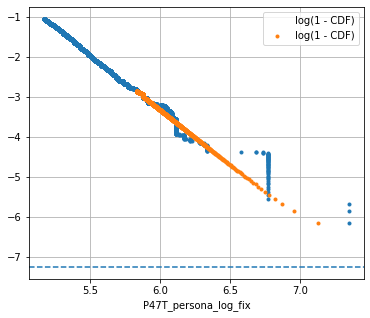

In [229]:
data['1 - CDF'] = data.P47T_persona.rank(pct = True, ascending = False)
data['log(1 - CDF)'] = np.log10(data['1 - CDF'])

fig, ax = plt.subplots(1, figsize = (6, 5))

plot_data = data.tail(120000)
plot_data.plot(x = 'P47T_persona_log', y = 'log(1 - CDF)', lw = 0, marker = '.', ax = ax)
plot_data.tail(2000).plot(x = 'P47T_persona_log_fix', y = 'log(1 - CDF)', lw = 0, marker = '.', ax = ax)


# x_fit = plot_data['P47T_persona_log']
# y_fit = plot_data['log(1 - CDF)']
# z = np.polyfit(x_fit, y_fit, 1)
# p = np.poly1d(z)

# xp = np.linspace(5, 7.5, 2)

# ax.plot(xp, p(xp), '-', c = 'r', label='%.2f x + %.2f' % tuple(z))
ax.axhline(np.log10(low_lim), linestyle = '--')
# ax.plot(x, y, '.', label = 'observations', c = '.3')

plt.grid()

plt.show()

In [236]:
data_top = data.loc[data['1 - CDF'] < .1]

nb = 10
data_top['cnt_bin'] = pd.qcut(data_top.P47T_persona_fix, nb)
data_top['log_bin'] = pd.cut(data_top.P47T_persona_log_fix, bins = nb)
data_top['val_bin'] = pd.cut(data_top.P47T_persona_fix.cumsum(), bins = nb)
data_top['val_bin'] = pd.cut(data_top.P47T_persona_fix.cumsum(), bins = nb)


<ipython-input-236-8eb7ae341377>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top['cnt_bin'] = pd.qcut(data_top.P47T_persona_fix, nb)
<ipython-input-236-8eb7ae341377>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top['log_bin'] = pd.cut(data_top.P47T_persona_log_fix, bins = nb)
<ipython-input-236-8eb7ae341377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [237]:
data_top.groupby('val_bin').agg({'P47T_persona_log_fix': 'mean', 'P47T_persona_fix': ['size', 'sum']})


P47T_persona_log_fix P47T_persona_fix  \
                                                   mean             size   
val_bin                                                                    
(-31391188.929, 3153134242.094]                5.159803            21820   
(3153134242.094, 6306129718.355]               5.194029            20162   
(6306129718.355, 9459125194.616]               5.226648            18701   
(9459125194.616, 12612120670.877]              5.266380            17069   
(12612120670.877, 15765116147.138]             5.308716            15482   
(15765116147.138, 18918111623.399]             5.355894            13885   
(18918111623.399, 22071107099.66]              5.411406            12216   
(22071107099.66, 25224102575.921]              5.487213            10253   
(25224102575.921, 28377098052.182]             5.607495             7735   
(28377098052.182, 31530093528.443]             5.873895             3854   

                                                  
                                             sum  
val_bin                                           
(-31391188.929, 3153134242.094]     3.153111e+09  
(3153134242.094, 6306129718.355]    3.153017e+09  
(6306129718.355, 9459125194.616]    3.152852e+09  
(9459125194.616, 12612120670.877]   3.153126e+09  
(12612120670.877, 15765116147.138]  3.152904e+09  
(15765116147.138, 18918111623.399]  3.153010e+09  
(18918111623.399, 22071107099.66]   3.153029e+09  
(22071107099.66, 25224102575.921]   3.153045e+09  
(25224102575.921, 28377098052.182]  3.152534e+09  
(28377098052.182, 31530093528.443]  3.153466e+09

In [238]:
data_top.groupby('cnt_bin').agg({'P47T_persona_log_fix': 'mean', 'P47T_persona_fix': ['size', 'sum']})


P47T_persona_log_fix P47T_persona_fix  \
                                                 mean             size   
cnt_bin                                                                  
(138765.83200000002, 145436.437]             5.154582            14118   
(145436.437, 153057.569]                     5.174526            14118   
(153057.569, 162454.271]                     5.200521            14117   
(162454.271, 174077.389]                     5.221457            14118   
(174077.389, 186593.965]                     5.254057            14118   
(186593.965, 202454.347]                     5.288371            14117   
(202454.347, 224396.697]                     5.325960            14118   
(224396.697, 256678.2]                       5.378068            14117   
(256678.2, 323201.27]                        5.454108            14118   
(323201.27, 13317251.296]                    5.664543            14118   

                                                
                                           sum  
cnt_bin                                         
(138765.83200000002, 145436.437]  2.015506e+09  
(145436.437, 153057.569]          2.110315e+09  
(153057.569, 162454.271]          2.240577e+09  
(162454.271, 174077.389]          2.351366e+09  
(174077.389, 186593.965]          2.534560e+09  
(186593.965, 202454.347]          2.743254e+09  
(202454.347, 224396.697]          2.991877e+09  
(224396.697, 256678.2]            3.373830e+09  
(256678.2, 323201.27]             4.025284e+09  
(323201.27, 13317251.296]         7.143523e+09

In [239]:
data['bin'] = pd.cut(data.P47T_persona_log_fix, bins = np.arange(1, 8, .1))
info = data.groupby('bin').agg(['mean', 'size', 'sum'])['P47T_persona_fix']
info[['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)
# info.sample(5)#.tail()

<ipython-input-239-82bee59c688f>:2: FutureWarning: ['cnt_bin', 'log_bin', 'val_bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  info = data.groupby('bin').agg(['mean', 'size', 'sum'])['P47T_persona_fix']


In [244]:
low_lim

5.666617319874173e-08

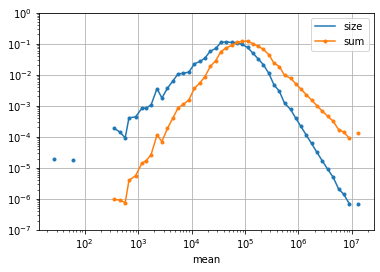

In [246]:
fig, ax = plt.subplots(1, figsize = (6, 4))
info.plot(x = 'mean', y = 'size', ax = ax, marker = '.')
info.plot(x = 'mean', y = 'sum', ax = ax, marker = '.')
ax.set_yscale('log')
ax.set_ylim(1e-7, 1)
ax.grid()
ax.set_xscale('log')

In [322]:
data['tot_log(1-CDF)'] = (-np.log10(data['1 - CDF']*frac*8))
data['top_group'] = pd.cut(data['tot_log(1-CDF)'], bins = np.arange(1, 9, 1), 
                           labels=['bottom 90%', 'top 10%', 'top 1%', 'top 0.1%', 'top 0.01%', 'top 0.001%', 'top 0.0001%'])

In [329]:
# (data['top_group'].value_counts()/8/frac).sort_index()

In [327]:
table = data.groupby('top_group').agg({'P47T_persona_fix': ['min', 'max', 'size', 'sum', 'mean']})['P47T_persona_fix']
table['size'] = table['size']/8/frac

for col in ['min', 'max', 'sum', 'mean']:
    magnitude = np.power(10, np.floor(np.log10(table[col])))
    table[col] = np.round(table[col]/magnitude, 3)*magnitude
    table[col] = table[col]/1e3

table.astype(int)
## Miles de pesos ARS

,min,max,size,sum,mean
top_group,,,,,
bottom 90%,0,126,15441312,62550000,50
top 10%,126,302,1985312,27970000,176
top 1%,302,704,198537,6309000,397
top 0.1%,704,1602,19850,1491000,939
top 0.01%,1605,3689,1987,342400,2154
top 0.001%,3769,8957,200,82820,5176
top 0.0001%,13320,13320,12,13320,13320


In [339]:
## ARS total
## Million USD
# data['P47T_persona_fix'].sum()/8/frac/220/1e6  # Total income USD
data['P47T_persona_fix'].mean()/220  # Mean income USD

317.97972414449504

In [341]:
# data['P47T_persona'].mean()/220  # Mean income USD

In [325]:
12/17000000

7.058823529411765e-07

In [321]:
table['size'].sum()

17647212.5

In [310]:
1235305/9*10

1372561.1111111112

In [290]:
# 1985312/9*100

In [ ]:
## Cant total de personas que perciben ingreso (en AGLOS)

1411777/8/frac = 17647212.5

# Ingreso

In [46]:
## INDICE DE PRECIOS - CONVERSION A VALOR CONSTANTE

cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

from datetime import datetime as dt
  
# Getting current date and time
today = dt.today()
ref = '2016-01'

cpi_actual = cpi_M.loc[today.strftime("%Y-%m")]['index'][0]
cpi_ref = cpi_M.loc[ref]['index'][0]

df_ARShoy = df*(cpi_actual/cpi_ref)

In [47]:
import matplotlib.ticker as mtick

def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('QS').mean().interpolate('linear').rolling(4, center = True).mean()


## Ingreso Total Familiar y Canastas. 

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#1f77b4', '#ff7f0e', '#d62728']

data = df_ARShoy
for i, v in enumerate(['P47T_hogar', 'CBT', 'CBA']):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    
    if v == 'P47T_hogar':
        moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
        data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
        
    else:
        data[v]['mean'].plot(ax =ax, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO TOTAL FAMILIAR Y CANASTA FAMILIAR')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 3e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Ingreso TF')
pts2 = mlines.Line2D([], [], color=colors[1], lw = 2, label='CB total')
pts3 = mlines.Line2D([], [], color=colors[2], lw = 2, label='CB alimentaria')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, medianLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso1.png')
plt.show()

## Ingreso Per Capita Familiar y Canastas. 

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#8c564b']

for i, (data, v) in enumerate([(df_ARShoy, 'IPCF')]):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO PER CAPITA FAMILIAR')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.2e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Ingreso PCF')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso2.png')
plt.show()

# Series de Tiempo. Hogares en Pobreza e Indigencia

In [ ]:
# Stats Hogares en Pobreza e Indigencia

df_listP = []
df_listI = []
for f in allFiles:
    print(f)
    
    vars_ = ['Pobreza', 'Indigencia', 'P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    dataP = data.loc[data.Pobreza == True]
    tableP = dataP.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])
    df_listP += [tableP]
    
    dataI = data.loc[data.Indigencia == True]
    tableI = dataI.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])
    df_listI += [tableI]

In [ ]:
dfHpob = pd.concat(df_listP)
dfHind = pd.concat(df_listI)

dfHpob.index = pd.to_datetime(dfHpob.index)
dfHind.index = pd.to_datetime(dfHind.index)

dfHpob_ARShoy = dfHpob*(cpi_actual/cpi_ref)
dfHind_ARShoy = dfHind*(cpi_actual/cpi_ref)

## Brechas de Pobreza e Indigencia

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#d62728', '#ff7f0e']

for i, (data, v) in enumerate([(dfHind_ARShoy, 'gap_indigencia'), (dfHpob_ARShoy, 'gap_pobreza')]):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('Brechas de Pobreza e Indigencia')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(-1e5, 0) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Brecha Indigentes')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Brecha Pobres')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso3.png')
plt.show()

In [ ]:
df_list2D = []

for f in allFiles:
    df_list = []
    
    print(f)
    cat_vars = ['Pobreza', 'Indigencia', 'CAT_OCUP', 'CAT_INAC', 'P02', 'INGRESO', 'INGRESO_JUB', 'Grupo_Etario_INDEC', 'PP07K']
    vars_ = ['P47T_persona']
    
    data = pd.read_csv(f, usecols = ['Q', 'AGLOMERADO'] + cat_vars + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    
    for cat_v in cat_vars:
        table = data.groupby(['Q', cat_v])['P47T_persona'].agg(['mean', q10, q25, 'median', q75, q90])
        df_list += [table]
        
    df_list2D += [df_list]
    
dfs = np.array(df_list2D)

In [ ]:
## Create tables for plotting next

for i, cat_v_tables in enumerate(list(dfs.T)):
    cat_var = cat_vars[i] 
    
    table = pd.concat(cat_v_tables)
    table = table.stack().unstack([-2, -1])
    table.index = pd.to_datetime(table.index)
    table = table*(cpi_actual/cpi_ref)
    
    globals()['table_' + cat_var] = table

## Personas con Ingreso

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## INGRESO == 1
data = table_INGRESO; v = 1; ## Tabla y valor de la categoria en cuestion
c = 'k'
ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('Personas con INGRESO')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color='k', lw = 0, label='Ingreso')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, medianLine, meanLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso4.png')
plt.show()

## Personas con Ingreso. Grupos etarios y Jubilados.

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## GRUPOS ETARIOS
data = table_Grupo_Etario_INDEC; 

colors = ['#2ca02c', '#9467bd', '#6e4196']
for i, v in enumerate(['(29, 64]', '(64, 110]']):
    c = colors[i]
    
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
#     data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## CAT_INAC == JUBILADOS
data = table_CAT_INAC; v = 1; ## Tabla y valor de la categoria en cuestion
c = colors[2]
ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
# data[v]['median'].plot(ax =ax, color = c, lw = .3)
moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO por grupo etario')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='29 a 64')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='65 o mas')
pts3 = mlines.Line2D([], [], marker = '.', color=colors[2], lw = 0, label='Jubilados')
# medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso5.png')
plt.show()

## Ingresos por condicion de Pobreza / Indigencia

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## CAT_INAC == JUBILADOS
colors = ['#2ca02c', '#ff7f0e', '#d62728']
for i, (data, v) in enumerate([(table_Pobreza, 0), (table_Pobreza, 1), (table_Indigencia, 1)]):
    c = colors[i]

    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')

## Plot Format
ax.set_title('INGRESO por condicion de pobreza')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='No Pobre')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Pobre')
pts3 = mlines.Line2D([], [], marker = '.', color=colors[2], lw = 0, label='Indigente')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, medianLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso6.png')
plt.show()

## Ingresos por genero

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## GRUPOS ETARIOS
data = table_P02; 
colors = ['#17becf', '#e377c2']
for i, v in enumerate([1, 2]):
    c = colors[i]
    label = ['Varon', 'Mujer'][i]
    pts, = ax.plot(data[v]['mean'], marker = '.', lw = 0, color = c, alpha = .5, label = label)
    data[v]['median'].plot(ax =ax, color = c, lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    
## Plot Format
ax.set_title('INGRESO por genero') # Titulo
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Varon')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Mujer')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso7.png')
plt.show()

In [ ]:
# ['P02', 'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'Grupo_Etario_INDEC', 'PP07K', 'Pobreza', 'Indigencia'
# 'CBA', 'CBT', 'CB_EQUIV', 'P47T_persona', 'P47T_hogar', 'gap_pobreza', 'gap_indigencia']